In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.shape

(2000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

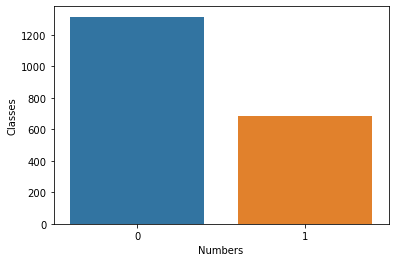

In [10]:
sns.countplot(df['Outcome'])
plt.xlabel('Numbers')
plt.ylabel('Classes')
plt.show()

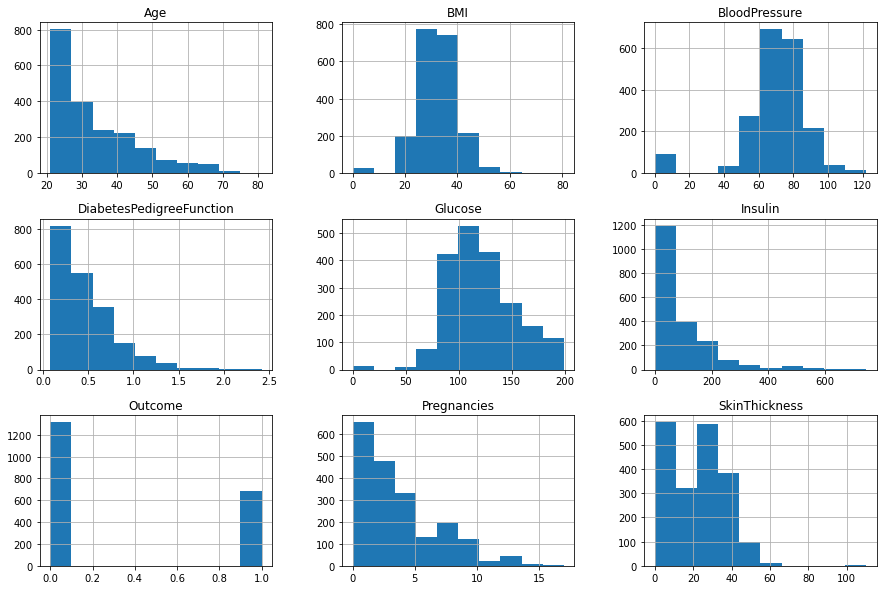

In [11]:
df.hist(figsize=(15,10))
plt.show()

In [12]:
df['Outcome'].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

In [13]:
def someCalculations(df,x):
    return (df == x).sum()

In [14]:
someCalculations(df['Pregnancies'],0)

301

In [15]:
someCalculations(df['Glucose'],0)

13

In [16]:
df_copy = df.copy()
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f203ee0e370>,
      dtype=object)

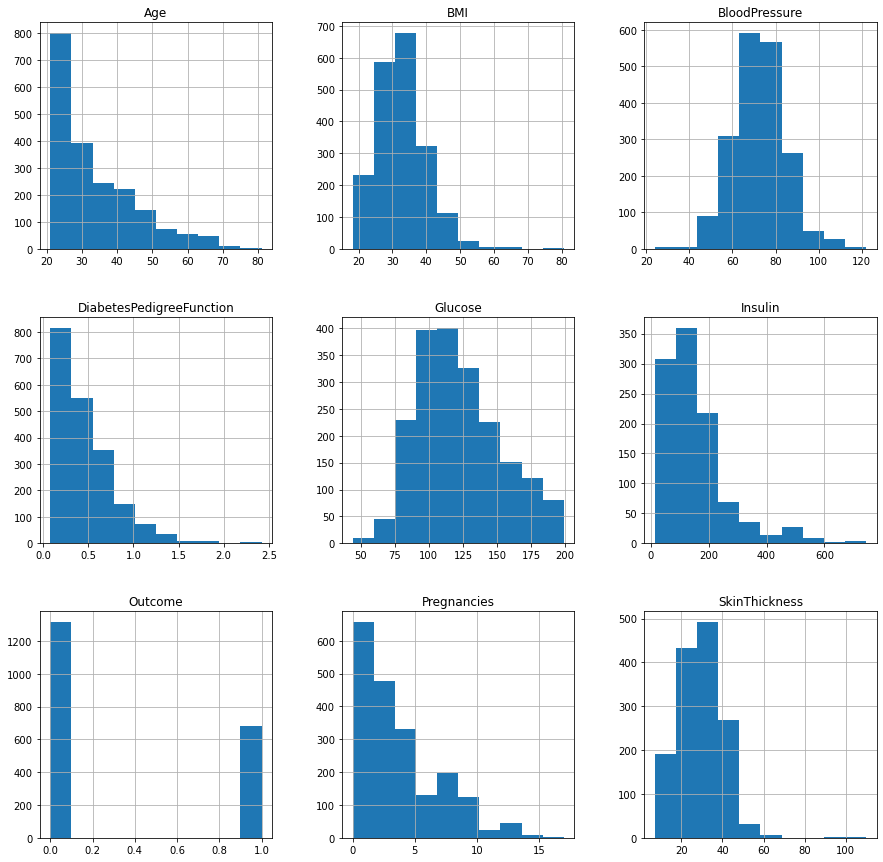

In [17]:
df_copy.hist(figsize= (15,15))

In [18]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].mean(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].mean(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(),inplace=True)

In [19]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

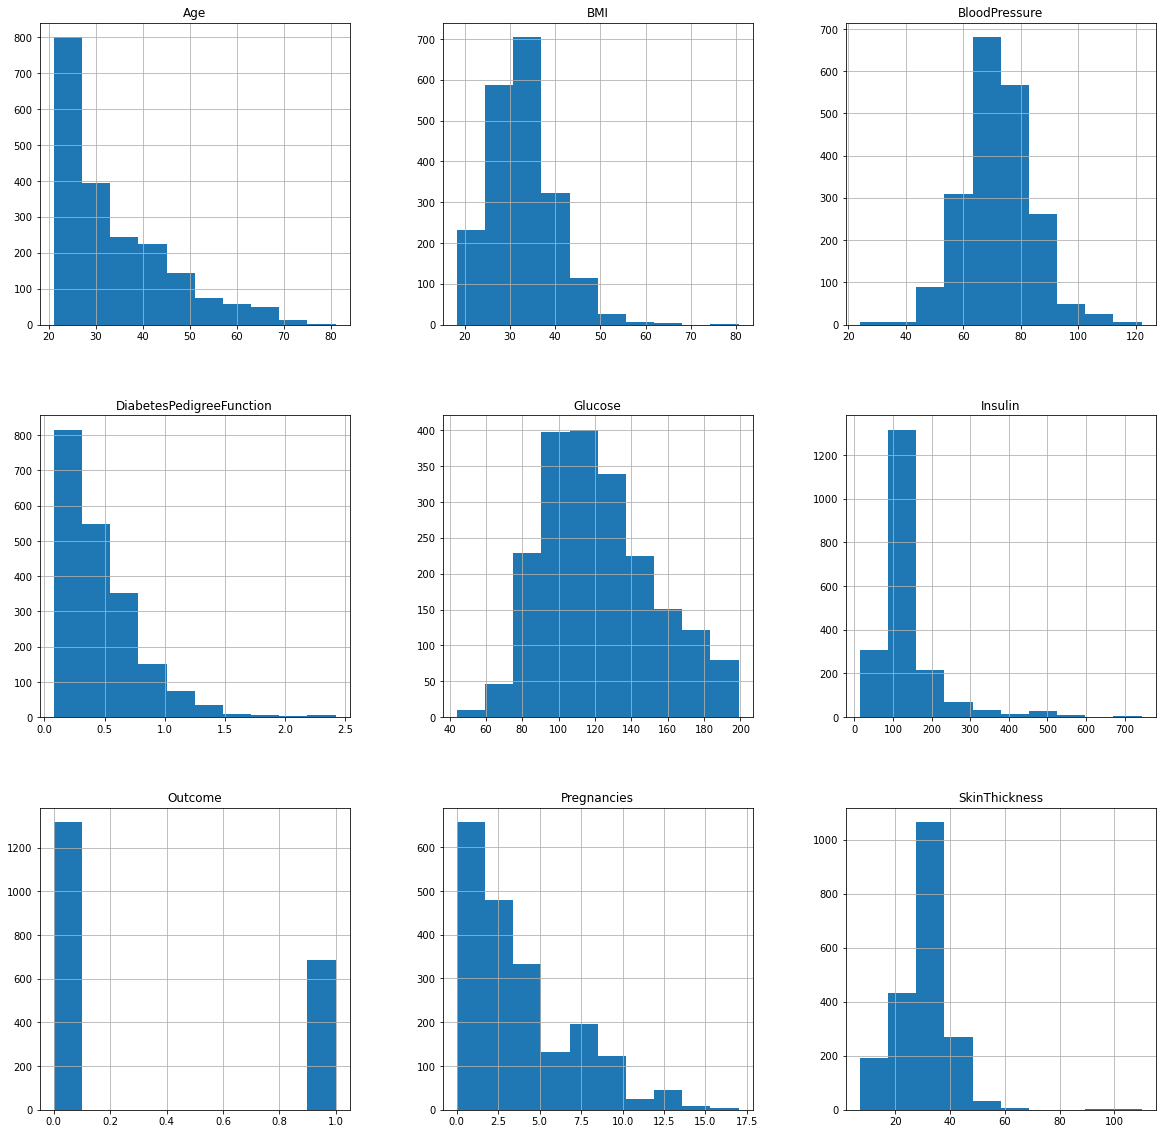

In [20]:
df_copy.hist(figsize=(20,20))
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(columns= 'Outcome')
Y = df['Outcome']

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1600, 8), X_test size: (400, 8)


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [24]:
def find_best_model(X,Y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver= 'lbfgs',multi_class= 'auto'),
            'parameters' :{
                'C': [1,5,10,15,20]
            }
        },
        
        'decison_tree_classifier':{
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters' :{
                'criterion' :['gini','entropy'],
                'max_depth' :[5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion= 'gini'),
            
            'parameters' :{
                'n_estimators': [1,5,10,15,20,30,40,50,60,70,80,90,100]
            }
        },
        
        'svc' : {
            'model' : SVC(gamma= 'auto'),
            
            'parameters': {
                'kernel' : ['rbf','linear'],
                'C': [1,10,20]
            }
        }
    }
    
    scores = []
    cv_shuffle = ShuffleSplit(n_splits=5,test_size= 0.2,random_state=0)
    
    for model_names,model_params in models.items():
        gc = GridSearchCV(model_params['model'],model_params['parameters'],cv = cv_shuffle,return_train_score= False)
        gc.fit(X,Y)
        scores.append({
            'model': model_names,
            'parameters' : gc.best_params_,
            'score' : gc.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,NaN,0.763125
1,decison_tree_classifier,NaN,0.901875
2,random_forest,NaN,0.953750
3,svc,NaN,0.869375


# Look like random forest is the best one for classifying this model

In [25]:
classifier = RandomForestClassifier(n_estimators=20,criterion='gini')
classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
y_pred[0]

0

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)

In [29]:
cm

array([[272,  11],
       [  0, 117]])

In [30]:
(272+124)/400

0.99

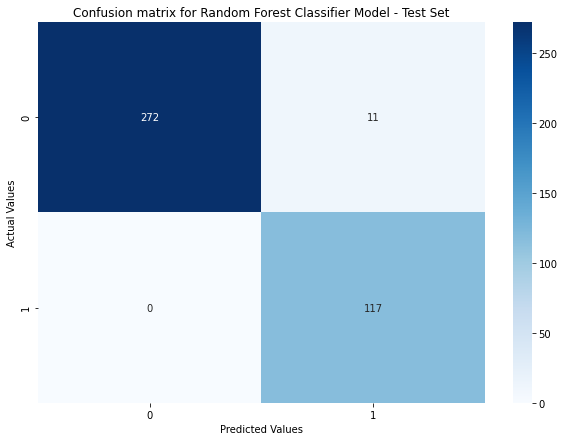

In [31]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [32]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.9725

In [33]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       272
           1       1.00      0.91      0.96       128

    accuracy                           0.97       400
   macro avg       0.98      0.96      0.97       400
weighted avg       0.97      0.97      0.97       400



In [34]:
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return classifier.predict(x)

In [35]:
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


In [36]:
import pickle
# open a file, where you ant to store the data
file = open('model.pkl', 'wb')

# dump information to that file
pickle.dump(classifier, file)